In [1]:
from sparsity_util import read_sparsity_info
import numpy as np

# Read SparsityInfo from file

In [2]:
b = read_sparsity_info('layer3_b0_act2')

In [3]:
np.average(b.avg)

0.6469301587822629

In [4]:
b.shape

(256, 14, 14)

In [5]:
b1 = b.slice_batch(1, 128).tile((1,7,7))
b2 = b.slice_batch(128, 256).tile((1,7,7))

# Visualize

In [6]:
%matplotlib notebook

from sparsity_util import SparsityMap3D, SparsityMap2D, SparsityMap1D

In [7]:
b1_map = SparsityMap3D(b1.avg)
b2_map = SparsityMap3D(b2.avg)

<IPython.core.display.Javascript object>


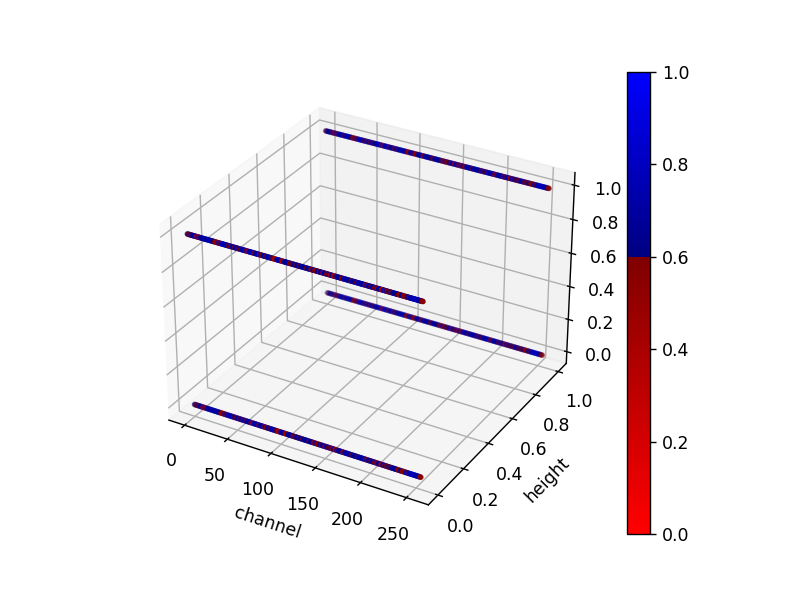

In [8]:
b1_map.draw()

<IPython.core.display.Javascript object>


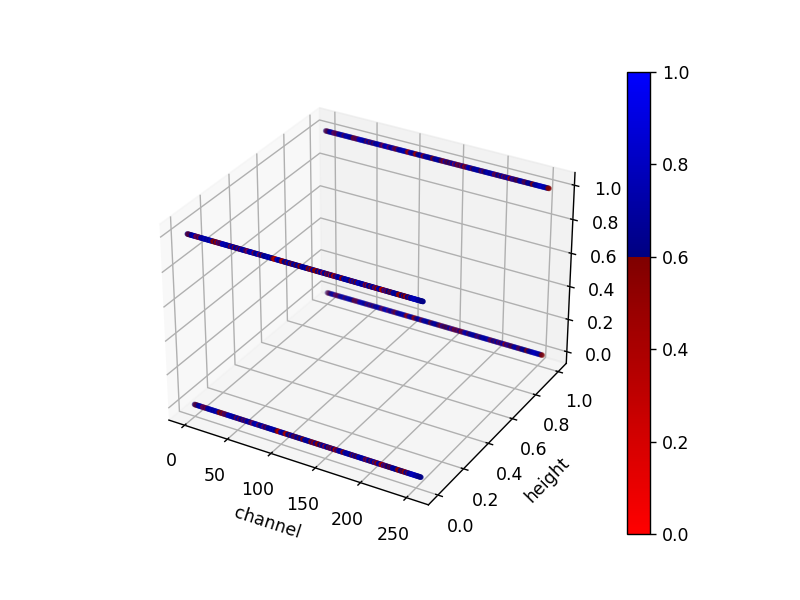

In [9]:
b2_map.draw()

# Sparsity Data on Channels

In [10]:
channel_avg1 = SparsityMap1D(b.slice_batch(0,128).group_by('channel').avg)
channel_avg2 = SparsityMap1D(b.slice_batch(128,256).group_by('channel').avg)

In [11]:
channel_avg1.sparsity_tensor

array([0.62045599, 0.46735491, 0.61714764, 0.57665019, 0.64923469,
       0.6015625 , 0.70388233, 0.60263871, 0.79005899, 0.66350446,
       0.25845026, 0.69666773, 0.40756537, 0.65577168, 0.41095344,
       0.70081314, 0.70113202, 0.7166773 , 0.65688776, 0.6566486 ,
       0.81608737, 0.75203284, 0.60367506, 0.68813776, 0.73812181,
       0.6556521 , 0.77112564, 0.77558992, 0.70679209, 0.64325574,
       0.62523916, 0.61232462, 0.58920599, 0.4607382 , 0.54663584,
       0.72452966, 0.51610332, 0.68411193, 0.52702487, 0.7450574 ,
       0.82433833, 0.73429528, 0.73848055, 0.69563138, 0.79591837,
       0.72038425, 0.59418846, 0.71803253, 0.63026148, 0.46548151,
       0.7427854 , 0.65589126, 0.69722577, 0.45822704, 0.65788425,
       0.74952168, 0.65242347, 0.58745217, 0.85522959, 0.625     ,
       0.57322226, 0.8252551 , 0.65421716, 0.71129624, 0.77399554,
       0.76965083, 0.53435906, 0.70854592, 0.21261161, 0.81632653,
       0.63687819, 0.71950733, 0.73134566, 0.82732781, 0.74218

<IPython.core.display.Javascript object>


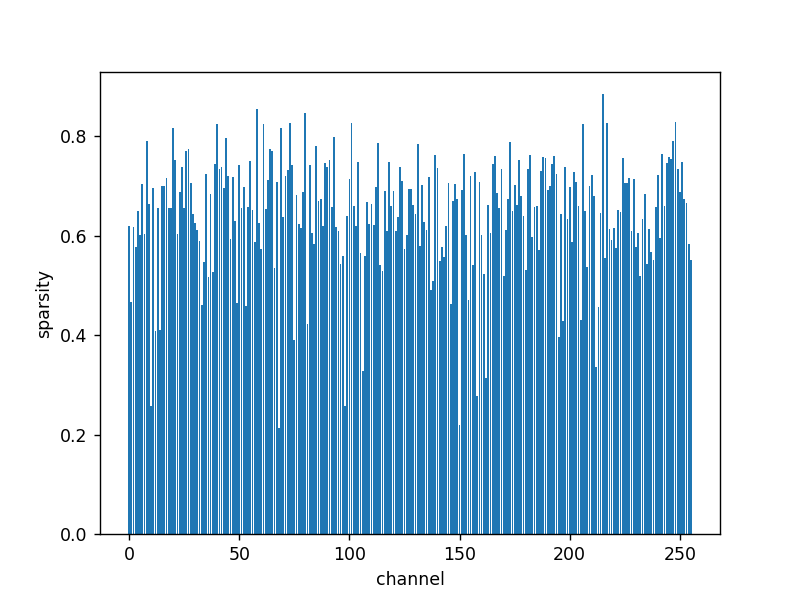

In [12]:
channel_avg1.draw()

<IPython.core.display.Javascript object>


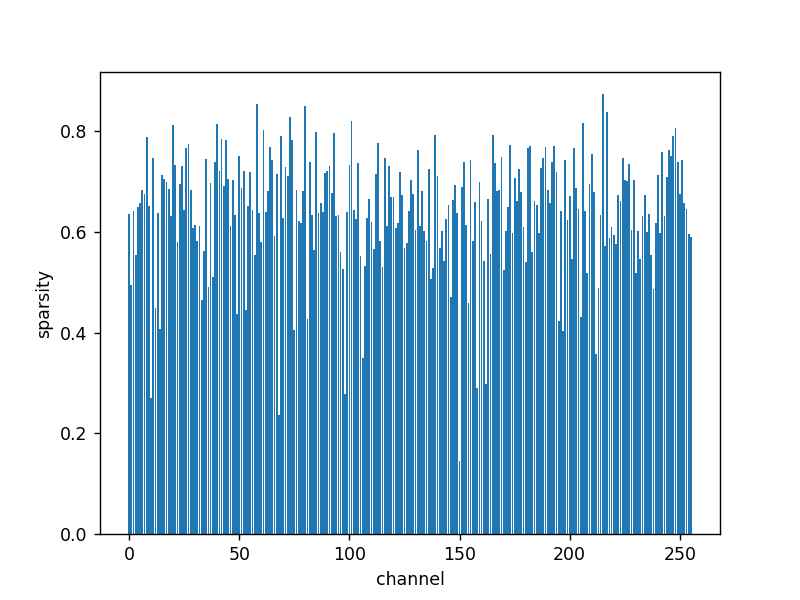

In [13]:
channel_avg2.draw()

# Tile in Height/Width Dim

In [14]:
M2D = SparsityMap2D(b.avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


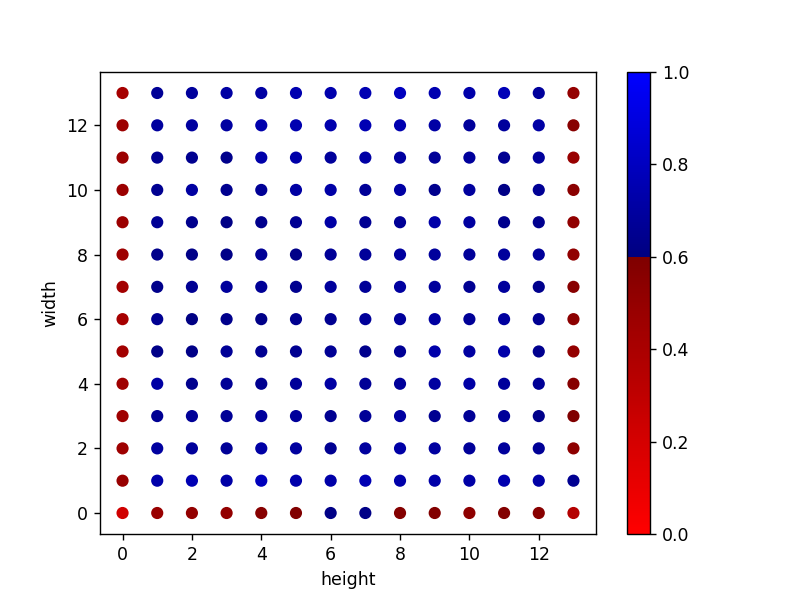

In [15]:
M2D.draw()

In [16]:
M2D_var1 = SparsityMap2D(b.slice_batch(0,128).avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])
M2D_var2 = SparsityMap2D(b.slice_batch(128,256).avg[4, :, :].reshape((b.shape[1], b.shape[2]))
                   , labels=['height', 'width'])

<IPython.core.display.Javascript object>


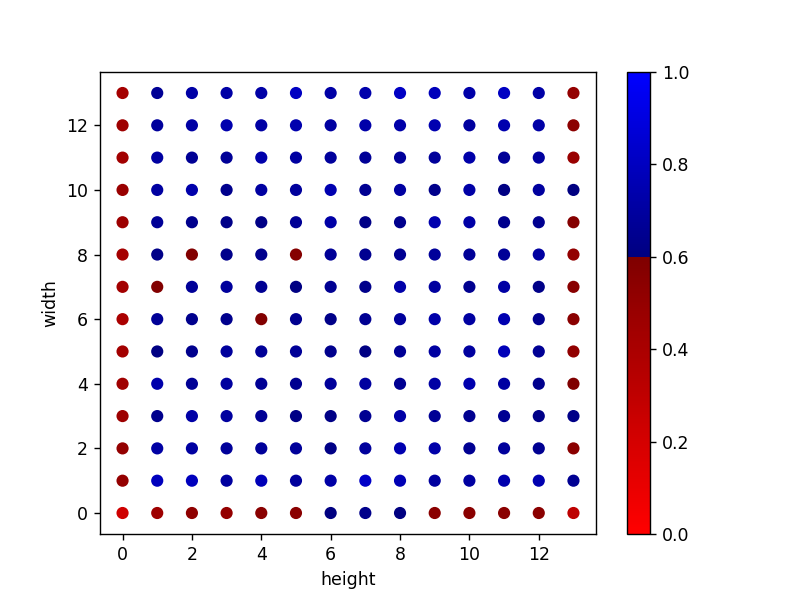

In [17]:
M2D_var1.draw()

<IPython.core.display.Javascript object>


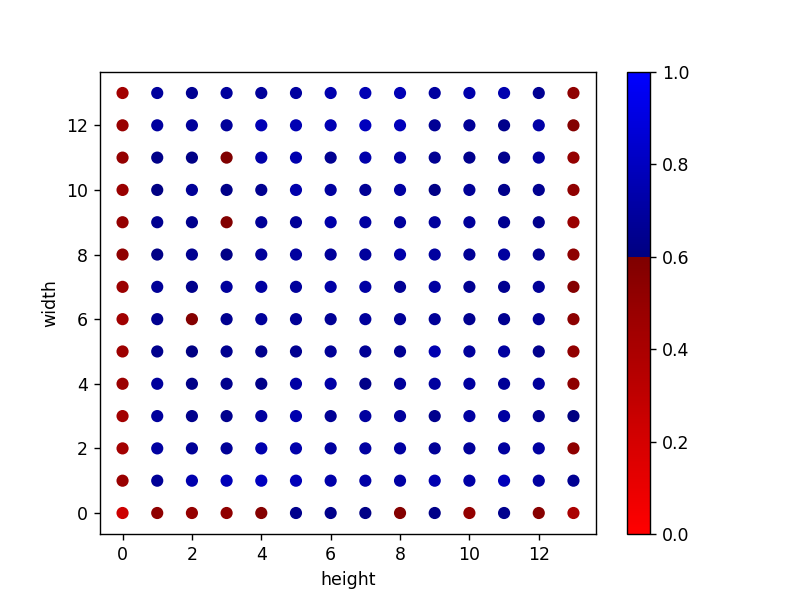

In [18]:
M2D_var2.draw()

# Weight Analysis

In [19]:
import torch
net = torch.load('/home/yzf/download/resnet18-5c106cde.pth')

In [20]:
net.keys()

odict_keys(['conv1.weight', 'bn1.running_mean', 'bn1.running_var', 'bn1.weight', 'bn1.bias', 'layer1.0.conv1.weight', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.conv2.weight', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.1.conv1.weight', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.conv2.weight', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer2.0.conv1.weight', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.conv2.weight', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.running_mean', 'layer2.0.downsample.1.running_var', 'layer2.0.downsample.1.weight', 'layer2.0.do

In [21]:
l1b0n1_bias = torch.tensor(net['layer3.0.bn1.bias']).numpy()

/tmp/ipykernel_7582/3565325324.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  l1b0n1_bias = torch.tensor(net['layer3.0.bn1.bias']).numpy()


<IPython.core.display.Javascript object>


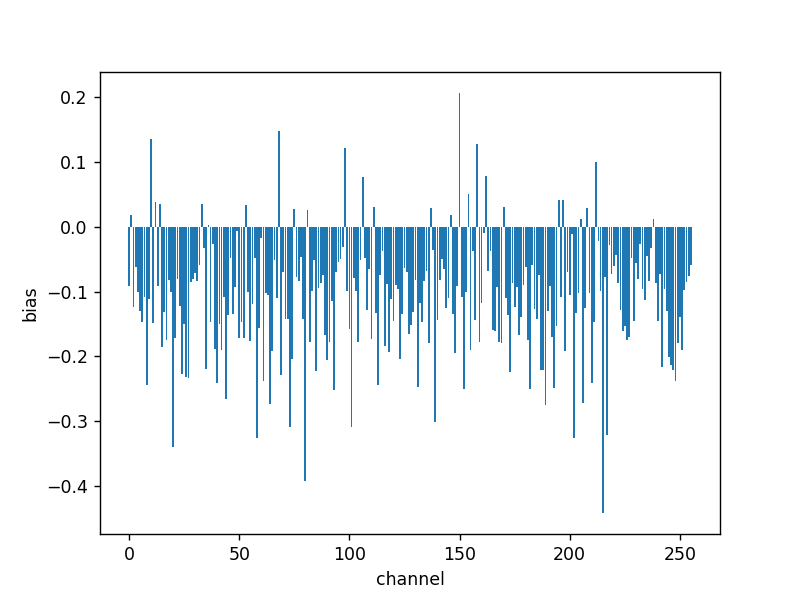

Text(0, 0.5, 'bias')

In [22]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(range(len(l1b0n1_bias)), l1b0n1_bias)
ax.set_xlabel('channel')
ax.set_ylabel('bias')